In [2]:
import pandas as pd
import pycaret.regression as pyreg
from scipy import stats
from sklearn.model_selection import train_test_split

# Merge all dataframes together

In [3]:
exome_scores=pd.read_csv('test_scores', sep="\t", index_col=False)

In [45]:
pheno=pd.read_csv('test_quan.pheno', sep="\t", usecols=['IID', 'trait1'])

In [47]:
pheno.rename(columns={'trait1': 'quan_trait'}, inplace=True)

In [41]:
pheno_02 = pd.read_csv('test.covariates', sep="\t")

In [48]:
df=pd.merge(exome_scores,pheno,on="IID", how="inner")

In [49]:
df=pd.merge(df,pheno_02,on="IID", how="inner")

In [50]:
prs_scores = pd.read_csv("toy_prs_scores.profile", sep='\s+', index_col=False, usecols=['IID','SCORESUM'])

In [51]:
df=pd.merge(df,prs_scores,on="IID", how="inner")

In [52]:
df.drop(columns=['IID'], inplace=True)

In [54]:
df.rename(columns={'SCORESUM':'prs'}, inplace=True)

In [55]:
df

,gene2,None,gene9,gene13,gene10,gene14,gene4,gene20,gene11,gene18,...,gene7,gene16,gene5,quan_trait,cov1,cov2,trait1,cov3,cov4,prs
0,0.00,0.00,0.000,3365.150,540.993,0.000,0.000,0.000,0.000,348.895,...,0.000,575.065,25088.8,-0.341595,0,-1.625090,1,8.726574,31.710137,176.53200
1,1797.34,0.00,0.000,970.737,0.000,0.000,0.000,416.185,0.000,0.000,...,0.000,0.000,22076.4,0.240091,1,-5.811727,1,9.316142,33.516517,183.48000
2,0.00,0.00,0.000,279.793,0.000,0.000,0.000,0.000,0.000,834.229,...,584.476,489.561,37386.4,-0.626819,1,-1.963263,1,11.865310,31.843437,-14.38920
3,0.00,0.00,0.000,501.564,382.792,0.000,0.000,0.000,0.000,0.000,...,0.000,863.585,23895.1,-1.624940,1,3.728375,1,10.800250,39.017370,34.07830
4,0.00,1620.36,0.000,0.000,491.140,0.000,489.624,440.925,731.540,0.000,...,0.000,0.000,38706.7,-0.994111,1,-7.761432,1,10.601949,46.708518,-41.02610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,0.00,0.00,810.199,501.564,344.731,453.064,0.000,918.701,942.855,0.000,...,498.459,0.000,48770.1,-0.045107,1,-2.217738,2,11.556165,27.274443,-13.82340
4987,0.00,1530.39,666.320,492.950,764.462,0.000,510.470,0.000,889.782,0.000,...,948.985,313.580,55900.7,-0.534653,0,2.722684,2,15.239004,31.326486,-29.76200
4988,0.00,0.00,0.000,1836.590,1291.940,0.000,511.152,413.762,897.004,0.000,...,0.000,264.032,24712.0,0.259591,1,-5.271312,2,12.733903,36.883699,134.79700
4989,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,586.583,0.000,...,0.000,0.000,44417.0,0.385009,0,-5.714401,1,11.893379,47.689051,-3.64391


# Regression model

## Genes and PRS

In [57]:
reg_df = df.drop(columns='trait1')

In [59]:
reg_all = pyreg.setup(target='quan_trait',session_id=1, data=reg_df, normalize=True, silent=True)

,Description,Value
0,session_id,1
1,Target,quan_trait
2,Original Data,"(4991, 26)"
3,Missing Values,False
4,Numeric Features,24
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3493, 25)"


In [61]:
reg_all_best_model = pyreg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.5644,0.4976,0.7053,0.4982,0.3396,6.4630,2.6710
gbr,Gradient Boosting Regressor,0.5609,0.4986,0.7059,0.4977,0.3399,4.5791,0.1280
lightgbm,Light Gradient Boosting Machine,0.5654,0.5035,0.7094,0.4924,0.3399,6.2991,0.0430
br,Bayesian Ridge,0.5658,0.5139,0.7165,0.4826,0.3418,5.5610,0.0090
lr,Linear Regression,0.5658,0.5139,0.7166,0.4825,0.3415,5.5933,0.1950
ridge,Ridge Regression,0.5658,0.5139,0.7166,0.4825,0.3415,5.5922,0.0070
lar,Least Angle Regression,0.5658,0.5139,0.7166,0.4825,0.3415,5.5933,0.0090
huber,Huber Regressor,0.5663,0.5142,0.7168,0.4822,0.3423,5.6373,0.0110
rf,Random Forest Regressor,0.5709,0.5161,0.7180,0.4799,0.3431,5.5852,0.3830
omp,Orthogonal Matching Pursuit,0.5680,0.5182,0.7195,0.4785,0.3436,5.6816,0.0090


In [62]:
reg_all_model = pyreg.create_model(reg_all_best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5453,0.4841,0.6958,0.5502,0.3462,1.5092
1,0.5579,0.4651,0.6820,0.4849,0.3372,10.0480
2,0.5656,0.4959,0.7042,0.5175,0.3455,2.4682
3,0.5829,0.5238,0.7238,0.5029,0.3413,3.2046
4,0.5728,0.5094,0.7137,0.4242,0.3428,3.5058
5,0.5651,0.5135,0.7166,0.5474,0.3383,27.7860
6,0.5655,0.4810,0.6935,0.5486,0.3429,2.0899
7,0.5631,0.5182,0.7199,0.5123,0.3267,2.7411
8,0.5662,0.5115,0.7152,0.4563,0.3306,9.0632
9,0.5596,0.4734,0.6880,0.4378,0.3444,2.2137


In [63]:
reg_all_tuned_model = pyreg.tune_model(reg_all_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5424,0.4865,0.6975,0.5479,0.3485,1.4448
1,0.5367,0.4466,0.6683,0.5055,0.3274,10.5195
2,0.5802,0.5076,0.7125,0.5061,0.3577,2.8197
3,0.5901,0.5377,0.7333,0.4898,0.3478,3.3320
4,0.5592,0.4937,0.7026,0.4419,0.3367,2.8659
5,0.5685,0.5187,0.7202,0.5428,0.3459,20.0385
6,0.5614,0.4938,0.7027,0.5366,0.3508,1.9530
7,0.5585,0.5303,0.7282,0.5010,0.3347,2.4927
8,0.5688,0.5255,0.7249,0.4413,0.3344,7.8971
9,0.5556,0.4670,0.6834,0.4454,0.3443,2.0189


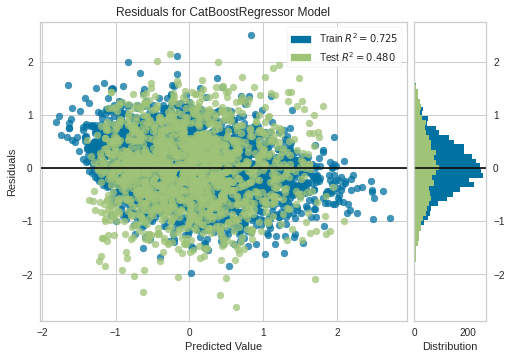

In [64]:
# plot precision recall
pyreg.plot_model(reg_all_tuned_model)

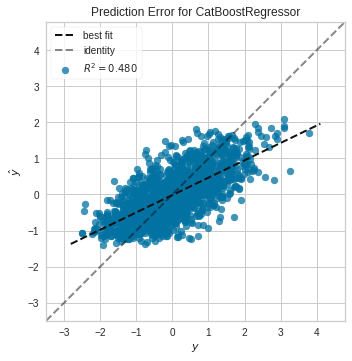

In [65]:
# plot auc
pyreg.plot_model(reg_all_tuned_model, plot = 'error')

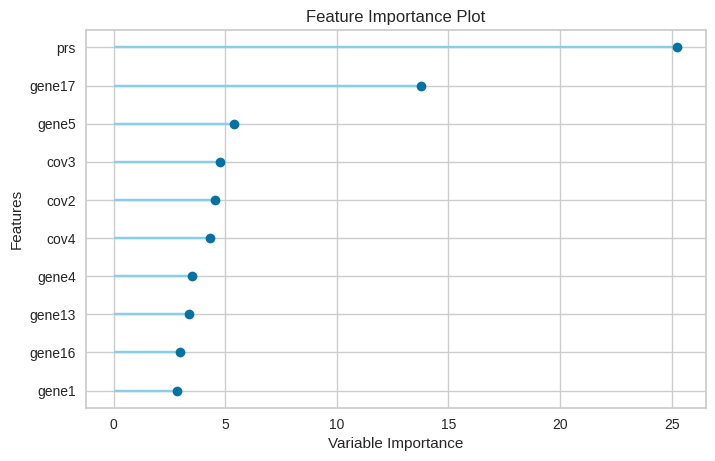

In [66]:
# plot feature importance
pyreg.plot_model(reg_all_model, plot='feature')

In [67]:
pyreg.predict_model(reg_all_tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.5717,0.5155,0.7180,0.4796,0.3392,3.9999


,gene2,None,gene9,gene13,gene10,gene14,gene4,gene20,gene11,gene18,...,gene7,gene16,gene5,cov2,cov3,cov4,prs,cov1_1,quan_trait,Label
0,-0.290185,-0.428747,-0.552471,4.853900,-0.259942,-0.476808,-0.568429,-0.203910,-0.272555,-0.277887,...,-0.694612,-0.440229,-1.129671,-0.360996,-1.469346,1.725516,-0.356471,0.0,-2.420100,-0.268375
1,0.098748,1.668082,-0.552471,-0.780364,-0.259942,0.095747,-0.568429,-0.338511,-0.000871,-0.277887,...,-0.694612,-0.010931,0.237330,0.131537,1.410663,-0.904319,-1.079586,1.0,-0.650199,-0.895910
2,-0.290185,-0.428747,-0.552471,0.194583,-0.259942,-0.476808,-0.568429,0.059646,-0.272555,-0.277887,...,-0.694612,-0.087182,-1.005623,-1.184245,0.676735,0.765701,1.355297,0.0,-0.654208,0.873140
3,-0.290185,-0.428747,0.445114,0.105497,-0.259942,0.108574,-0.568429,0.658199,-0.107202,3.976583,...,0.900472,-0.440229,-0.678058,-1.423744,-0.999296,0.569644,-0.320648,0.0,1.377910,-0.047247
4,-0.290185,0.114116,2.569877,-0.780364,-0.036801,-0.476808,1.840868,-0.581419,0.905808,-0.277887,...,-0.694612,-0.440229,1.528666,-0.459743,0.911411,-0.244057,0.084165,1.0,1.063440,0.162965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,-0.290185,0.558716,-0.552471,-0.441419,-0.259942,-0.476808,-0.568429,-0.581419,0.028334,-0.277887,...,3.690420,-0.119738,-0.652238,0.121492,1.500931,-0.378259,-0.244330,0.0,0.590038,0.240069
1494,0.075273,-0.428747,-0.552471,3.296227,-0.259942,0.812932,-0.568429,-0.338234,-0.272555,-0.277887,...,1.158073,0.116414,-0.634611,-0.930423,-1.251952,1.198286,2.200929,1.0,0.438009,1.551069
1495,-0.290185,0.137075,-0.552471,-0.780364,-0.259942,-0.476808,1.155317,-0.581419,0.147023,-0.277887,...,-0.694612,-0.016428,-1.331543,1.828501,-1.422279,0.857566,2.514512,1.0,2.606880,1.582642
1496,0.366809,-0.428747,-0.552471,0.817588,-0.182704,-0.476808,0.719425,-0.581419,0.028334,-0.277887,...,0.096604,-0.440229,-1.596718,-0.769509,-0.950470,0.258360,1.941077,0.0,1.900770,0.469482


In [68]:
all_final_model = pyreg.finalize_model(reg_all_tuned_model)

## Genes only

In [79]:
genes_reg_df = reg_df.drop(columns='prs')

In [82]:
reg_genes = pyreg.setup(target='quan_trait',session_id=1, data=genes_reg_df, normalize=True, silent=True)

,Description,Value
0,session_id,1
1,Target,quan_trait
2,Original Data,"(4991, 25)"
3,Missing Values,False
4,Numeric Features,23
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3493, 24)"


In [83]:
reg_genes_best_model = pyreg.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.6690,0.6986,0.8353,0.2986,0.3964,6.3854,0.1200
catboost,CatBoost Regressor,0.6703,0.6984,0.8353,0.2977,0.3885,6.6258,2.1520
lightgbm,Light Gradient Boosting Machine,0.6775,0.7148,0.8450,0.2820,0.3892,7.5357,0.0440
rf,Random Forest Regressor,0.6838,0.7317,0.8550,0.2645,0.3973,6.2972,0.3590
et,Extra Trees Regressor,0.6885,0.7439,0.8621,0.2520,0.3969,7.3005,0.2130
ada,AdaBoost Regressor,0.6921,0.7470,0.8638,0.2502,0.4209,3.9318,0.0560
br,Bayesian Ridge,0.6925,0.7526,0.8669,0.2444,0.4075,4.8651,0.0090
lr,Linear Regression,0.6927,0.7527,0.8670,0.2441,0.4055,4.9730,0.1960
ridge,Ridge Regression,0.6927,0.7527,0.8670,0.2441,0.4056,4.9714,0.0090
lar,Least Angle Regression,0.6927,0.7527,0.8670,0.2441,0.4055,4.9730,0.0100


In [84]:
reg_genes_model = pyreg.create_model(reg_genes_best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6937,0.7322,0.8557,0.3196,0.4163,1.8804
1,0.6418,0.6357,0.7973,0.2960,0.3899,6.9029
2,0.6851,0.7278,0.8531,0.2918,0.4089,3.9686
3,0.6959,0.7171,0.8468,0.3196,0.4039,3.5367
4,0.6417,0.6576,0.8109,0.2566,0.3782,2.4021
5,0.6822,0.7235,0.8506,0.3622,0.4001,32.6541
6,0.6791,0.7297,0.8542,0.3152,0.4074,1.9608
7,0.6819,0.7412,0.8609,0.3025,0.3909,5.4017
8,0.6814,0.7260,0.8521,0.2282,0.3813,3.1874
9,0.6067,0.5946,0.7711,0.2939,0.3868,1.9596


In [85]:
reg_genes_tuned_model = pyreg.tune_model(reg_genes_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6976,0.7390,0.8597,0.3133,0.4119,1.8631
1,0.6446,0.6369,0.7980,0.2947,0.3741,6.4751
2,0.6878,0.7318,0.8554,0.2880,0.4087,3.3070
3,0.7006,0.7343,0.8569,0.3032,0.4012,4.1298
4,0.6549,0.6695,0.8182,0.2432,0.3739,2.8231
5,0.6880,0.7324,0.8558,0.3544,0.3943,30.0417
6,0.6833,0.7348,0.8572,0.3103,0.3997,2.2126
7,0.6674,0.7238,0.8508,0.3189,0.3846,8.2953
8,0.6927,0.7446,0.8629,0.2084,0.3868,4.0308
9,0.6113,0.5920,0.7694,0.2969,0.3707,2.1083


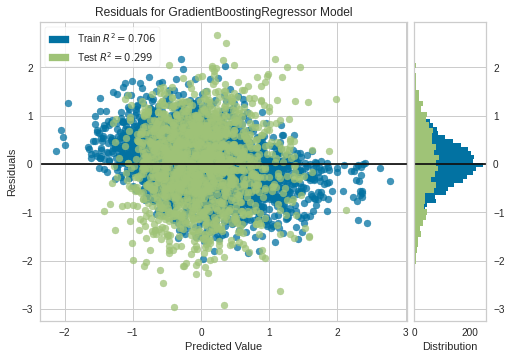

In [86]:
# plot precision recall
pyreg.plot_model(reg_genes_tuned_model)

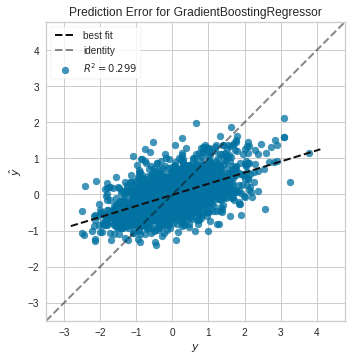

In [87]:
# plot auc
pyreg.plot_model(reg_genes_tuned_model, plot = 'error')

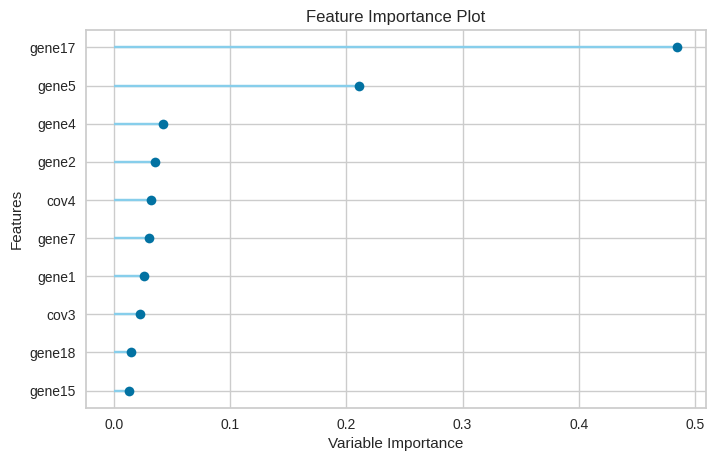

In [88]:
# plot feature importance
pyreg.plot_model(reg_genes_model, plot='feature')

# Classifier

In [69]:
import pycaret.classification as pycl

In [70]:
cl_df = df.drop(columns='quan_trait')

In [71]:
classifier_setup = pycl.setup(target='trait1',session_id=1, data=cl_df, fix_imbalance=True, silent=True)

,Description,Value
0,session_id,1
1,Target,trait1
2,Target Type,Binary
3,Label Encoded,"1: 0, 2: 1"
4,Original Data,"(4991, 26)"
5,Missing Values,False
6,Numeric Features,24
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [72]:
best_model = pycl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9322,0.9850,0.8953,0.8803,0.8874,0.8388,0.8393,3.5030
xgboost,Extreme Gradient Boosting,0.9304,0.9837,0.8934,0.8765,0.8846,0.8348,0.8352,28.2390
gbc,Gradient Boosting Classifier,0.9296,0.9845,0.9078,0.8637,0.8849,0.8342,0.8351,0.2170
lightgbm,Light Gradient Boosting Machine,0.9290,0.9854,0.8876,0.8770,0.8819,0.8312,0.8316,0.0610
rf,Random Forest Classifier,0.9279,0.9817,0.9164,0.8539,0.8835,0.8314,0.8331,0.1780
et,Extra Trees Classifier,0.9250,0.9777,0.8790,0.8714,0.8749,0.8214,0.8216,0.1370
ada,Ada Boost Classifier,0.9224,0.9831,0.8915,0.8554,0.8726,0.8169,0.8177,0.0660
dt,Decision Tree Classifier,0.9107,0.8991,0.8703,0.8376,0.8530,0.7889,0.7898,0.0180
ridge,Ridge Classifier,0.8981,0.0000,0.9126,0.7824,0.8423,0.7677,0.7729,0.0120
lda,Linear Discriminant Analysis,0.8981,0.9711,0.9126,0.7824,0.8423,0.7677,0.7729,0.0120


In [73]:
model = pycl.create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9457,0.9893,0.9231,0.8972,0.9100,0.8711,0.8713
1,0.9343,0.9861,0.8654,0.9091,0.8867,0.8405,0.8410
2,0.9143,0.9806,0.8571,0.8571,0.8571,0.7959,0.7959
3,0.9226,0.9845,0.9231,0.8348,0.8767,0.8206,0.8228
4,0.9484,0.9842,0.8942,0.9300,0.9118,0.8753,0.8757
5,0.9284,0.9858,0.8942,0.8692,0.8815,0.8302,0.8304
6,0.9341,0.9861,0.8942,0.8857,0.8900,0.8429,0.8429
7,0.9312,0.9825,0.9038,0.8704,0.8868,0.8374,0.8377
8,0.9427,0.9901,0.9038,0.9038,0.9038,0.8630,0.8630
9,0.9198,0.9811,0.8942,0.8455,0.8692,0.8114,0.8120


In [74]:
tuned_model = pycl.tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9429,0.9892,0.9519,0.8684,0.9083,0.8669,0.8688
1,0.9343,0.9867,0.8846,0.8932,0.8889,0.8422,0.8423
2,0.9114,0.9821,0.8571,0.8491,0.8531,0.7897,0.7897
3,0.9226,0.9847,0.9327,0.8291,0.8778,0.8215,0.8246
4,0.9341,0.9827,0.8846,0.8932,0.8889,0.8420,0.8421
5,0.9370,0.9872,0.9327,0.8661,0.8981,0.8526,0.8538
6,0.9370,0.9862,0.9038,0.8868,0.8952,0.8502,0.8502
7,0.9370,0.9819,0.9423,0.8596,0.8991,0.8534,0.8553
8,0.9484,0.9900,0.9135,0.9135,0.9135,0.8767,0.8767
9,0.9169,0.9812,0.8942,0.8378,0.8651,0.8052,0.8061


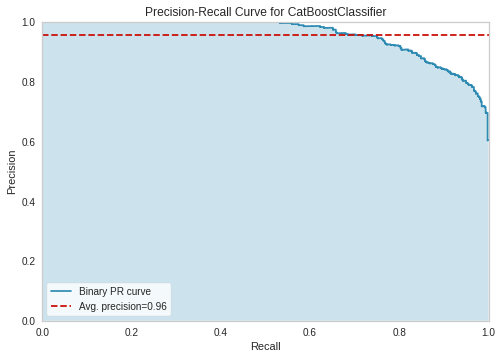

In [75]:
# plot precision recall
pycl.plot_model(tuned_model, plot = 'pr')

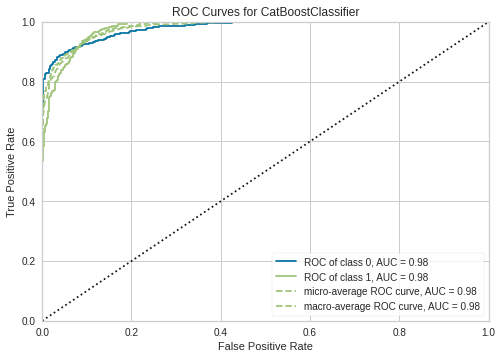

In [76]:
# plot auc
pycl.plot_model(tuned_model, plot = 'auc')

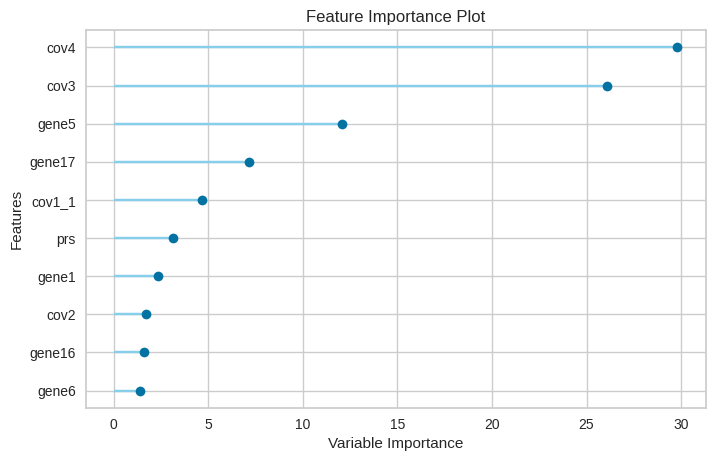

In [77]:
pycl.plot_model(tuned_model, plot='feature')

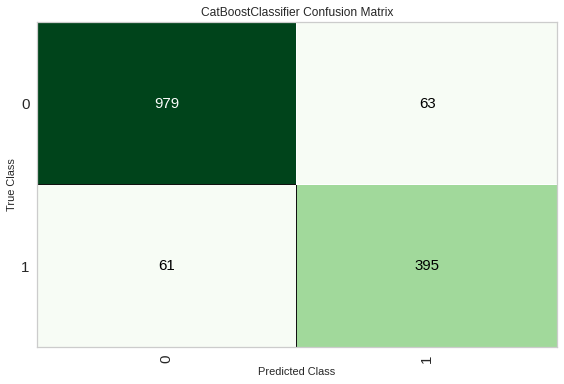

In [78]:
pycl.plot_model(tuned_model, plot = 'confusion_matrix')